In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [14]:
face_sync_df = pd.read_csv('../../stats/sync-vid-preds-211129-0205.csv')
display(face_sync_df)

,filename,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,3dbe8314b86284eb.mp4,0.117795,0.118622,0.092346,0.141684,0.043203,0.214692,0.037435,1
1,1b8d86fe4003ec39.mp4,0.050223,0.032386,0.025892,0.073097,0.038481,0.163555,0.002847,0
2,cabecda3272f85d1.mp4,0.051947,0.038505,0.026824,0.050270,0.049870,0.259640,0.004800,0
3,8a715b8d45ad42bb.mp4,0.999930,1.000000,0.999998,1.000000,0.000303,1.000000,0.998422,0
4,751dc59c35c1809d.mp4,0.210792,0.176562,0.148610,0.217516,0.093894,0.452990,0.133601,0
...,...,...,...,...,...,...,...,...,...
3262,aace3bd7f5c15109.mp4,0.239210,0.072887,0.025563,0.280174,0.326656,0.979346,0.001780,0
3263,a906a11a463e2fd1.mp4,0.999961,1.000000,0.999994,1.000000,0.000120,1.000000,0.999399,0
3264,2ec139efc01c35b1.mp4,0.131702,0.125345,0.096474,0.159112,0.043632,0.211927,0.056309,1
3265,0e4acde05b3af5b6.mp4,0.192087,0.147043,0.094213,0.224593,0.130262,0.442948,0.021526,0


In [15]:
face_sync_df = face_sync_df.groupby('filename', sort=False).agg(min)
sync_df = pd.merge(
    left=labels_df, right=face_sync_df, 
    left_on='filename', right_on='filename'
)
# print(np.unique(sync_df['face_no']))
display(sync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,18351609de111566.mp4,1,0.0,0.0,1,0,0.983315,0.998817,0.989698,0.999977,0.036939,1.000000,0.845564,0
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.924221,0.996719,0.938110,0.999593,0.157259,1.000000,0.412667,0
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.979201,0.998099,0.988659,0.999946,0.046366,1.000000,0.800444,0
3,50e301013618719d.mp4,1,0.0,0.0,1,0,0.878396,0.962840,0.838029,0.995260,0.176273,0.999985,0.409920,0
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.969901,0.998561,0.973464,0.999952,0.061432,1.000000,0.772462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.298381,0.234210,0.170748,0.361059,0.199597,0.996303,0.051373,0
3263,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.054899,0.044349,0.025679,0.077244,0.041418,0.189570,0.004591,0
3264,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.088892,0.046911,0.028509,0.096651,0.115718,0.626921,0.017754,0
3265,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.078297,0.057593,0.019375,0.086701,0.094905,0.441023,0.000450,0


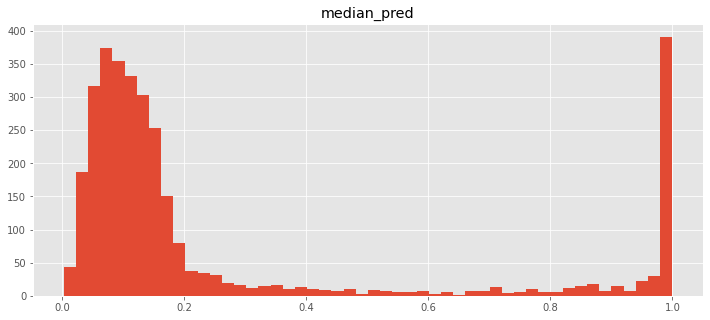

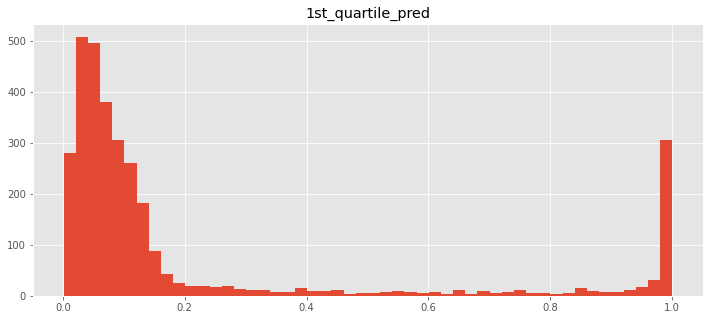

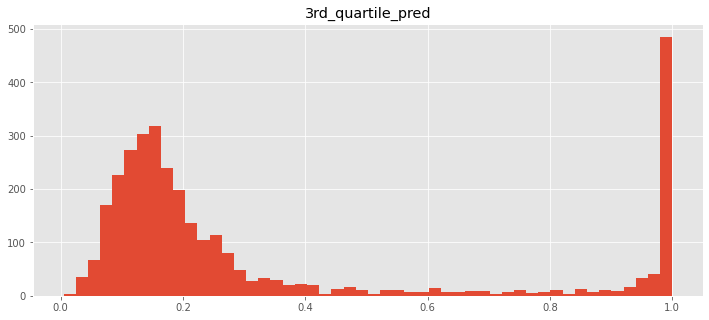

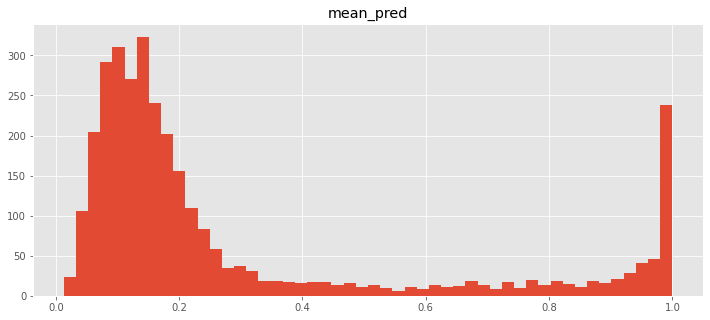

In [24]:
for metric in ['median_pred', '1st_quartile_pred', '3rd_quartile_pred', 'mean_pred']:
    preds = sync_df[metric]
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.title(metric)
    plt.hist(preds, density=False, bins=50)  # density=False would make counts

In [17]:
rsync_df = sync_df[
    (sync_df['swap_fake'] == 1) |
    (sync_df['label'] == 0)
]
display(rsync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,18351609de111566.mp4,1,0.0,0.0,1,0,0.983315,0.998817,0.989698,0.999977,0.036939,1.000000,0.845564,0
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.924221,0.996719,0.938110,0.999593,0.157259,1.000000,0.412667,0
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.979201,0.998099,0.988659,0.999946,0.046366,1.000000,0.800444,0
3,50e301013618719d.mp4,1,0.0,0.0,1,0,0.878396,0.962840,0.838029,0.995260,0.176273,0.999985,0.409920,0
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.969901,0.998561,0.973464,0.999952,0.061432,1.000000,0.772462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.298381,0.234210,0.170748,0.361059,0.199597,0.996303,0.051373,0
3263,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.054899,0.044349,0.025679,0.077244,0.041418,0.189570,0.004591,0
3264,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.088892,0.046911,0.028509,0.096651,0.115718,0.626921,0.017754,0
3265,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.078297,0.057593,0.019375,0.086701,0.094905,0.441023,0.000450,0


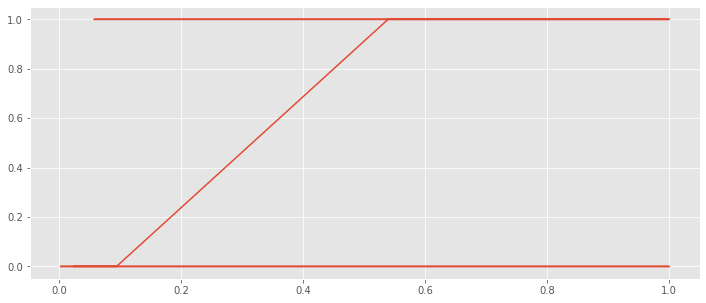

In [18]:
r_preds, r_labels = rsync_df['median_pred'], rsync_df['label']
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.plot(r_preds, r_labels)

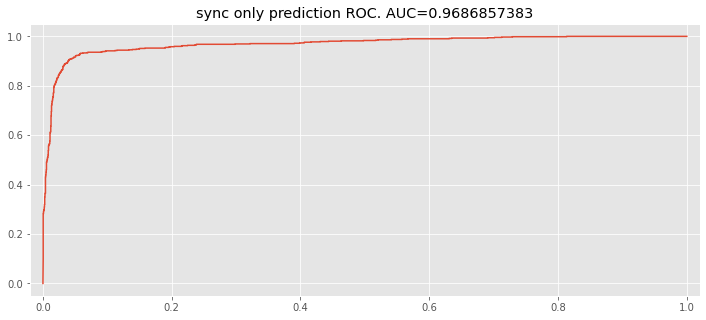

In [19]:
fpr, tpr, _ = sklearn.metrics.roc_curve(r_labels, r_preds)
auc = sklearn.metrics.roc_auc_score(r_labels, r_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("sync only prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

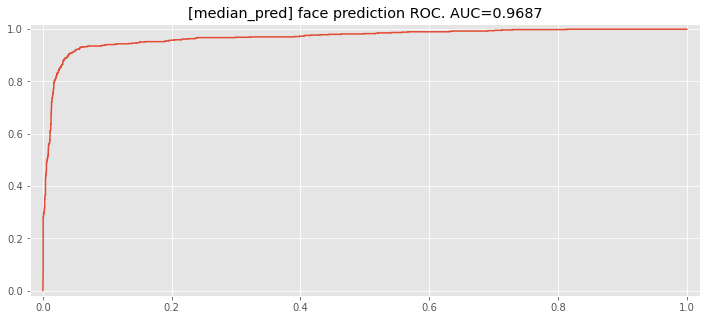

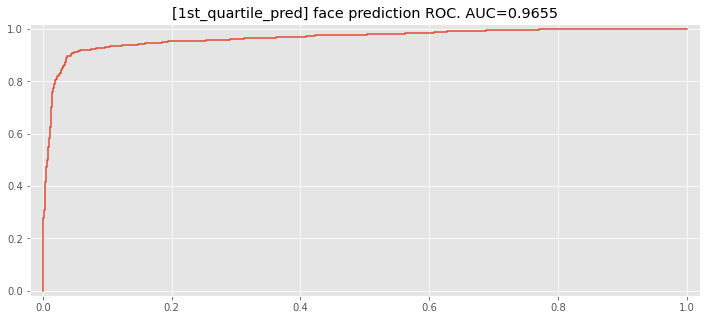

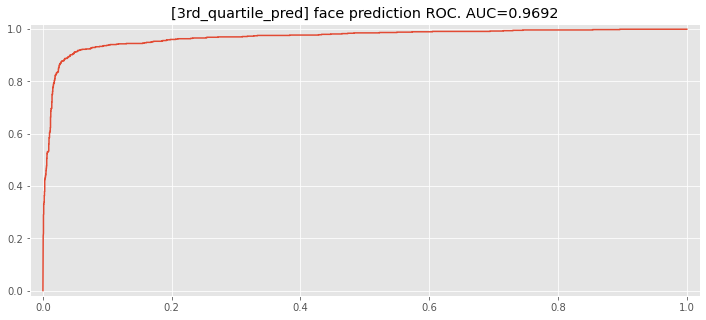

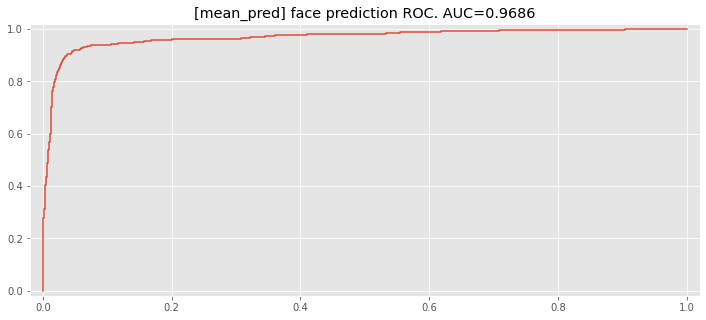

In [23]:
for metric in ['median_pred', '1st_quartile_pred', '3rd_quartile_pred', 'mean_pred']:
    labels = rsync_df['label'].to_numpy()
    sync_preds = rsync_df[metric].to_numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, sync_preds)
    auc = sklearn.metrics.roc_auc_score(labels, sync_preds)

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.title(f"[{metric}] face prediction ROC. AUC="+str(round(auc, 4)))
    plt.plot(fpr, tpr)